In [1]:
# 载入此项目所需要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 让结果在notebook中显示
%matplotlib inline

In [2]:
#载入数据集
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
store_data = pd.read_csv("store.csv")

print ("Train dataset has {} data points with {} variables each.".format(*train_data.shape))

C:\Users\Administrator\Anaconda3\envs\robot-env\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Train dataset has 1017209 data points with 9 variables each.


In [3]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
train_data['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [5]:
train_data[(train_data.Open == 0)].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


In [6]:
train_data[(train_data['Open'] != 0) & (train_data['Sales'] == 0)].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
86825,971,5,2015-05-15,0,0,1,0,0,1
142278,674,4,2015-03-26,0,0,1,0,0,0
196938,699,4,2015-02-05,0,0,1,1,0,0
322053,708,3,2014-10-01,0,0,1,1,0,0
330176,357,1,2014-09-22,0,0,1,0,0,0


In [7]:
#显示训练数据中关闭的商店数量
closed_store = train_data[train_data['Open'] == 0]['Open']

#显示训练数据中未关闭但销售额为0的商店数量
zero_sales = train_data[(train_data['Open'] != 0) & (train_data['Sales'] == 0)]

print (closed_store.count(),' ',zero_sales['Open'].count())

#从训练数据中剔除关闭的商店和异常数据
new_train_data = train_data[(train_data['Open'] != 0) & (train_data['Sales'] != 0)]
print ("New train dataset has {} data points with {} variables each.".format(*new_train_data.shape))

172817   54
New train dataset has 844338 data points with 9 variables each.


In [8]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
#从数据中查找NaN值

store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [10]:
#首先查看CompetitionDistance系列出现的NaN值

from IPython.display import display

display(store_data[pd.isnull(store_data['CompetitionDistance'])])
display(store_data[pd.isnull(store_data['CompetitionOpenSinceMonth'])].head())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [11]:
#查看Promo2系列出现的NaN值

display(store_data[pd.isnull(store_data['Promo2SinceWeek'])].head())

#查看参加促销但Promo2系列出现NaN值的数据
p = store_data[pd.isnull(store_data['Promo2SinceWeek'])]
p[p.Promo2 != 0].shape

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


(0, 10)

In [12]:
# 用0填充数据中的NaN值

new_store_data = store_data.fillna(0.0)
display(new_store_data.head())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [13]:
#将训练数据与含有商店特征的商店数据合并

train_and_store = pd.merge(new_train_data, new_store_data, how = 'inner', on = 'Store')
display(train_and_store.head())
train_and_store.shape

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


(844338, 18)

In [14]:
#在数据中添加‘Year’he ‘Month’两列用于数据探索

train_and_store['Year'] = train_and_store['Date'].apply(lambda x: int(x[:4]))
train_and_store['Month'] = train_and_store['Date'].apply(lambda x: int(x[5:7]))
train_and_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [15]:
#查看不同类型商店的销售情况

store_type = train_and_store.groupby('StoreType')['Sales','Customers'].sum()
store_promo = train_and_store.groupby('StoreType')['Promo','Promo2'].sum()
store_type['SMean'] = store_type['Sales'] / store_type['Customers']

store_type['All'] = train_and_store.groupby('StoreType')['Store'].count()
store_type['PromoP'] = (store_promo['Promo'] / store_type['All']).apply(lambda x: format(x, '.2%'))
store_type['PromoP2'] = (store_promo['Promo2'] / store_type['All']).apply(lambda x: format(x, '.2%'))

display(store_type)

,Sales,Customers,SMean,All,PromoP,PromoP2
StoreType,,,,,,
a,3165334859,363541431,8.706944,457042,44.75%,46.60%
b,159231395,31465616,5.060489,15560,38.16%,28.86%
c,783221426,92129705,8.501291,112968,44.91%,49.76%
d,1765392943,156904995,11.251350,258768,44.71%,56.95%


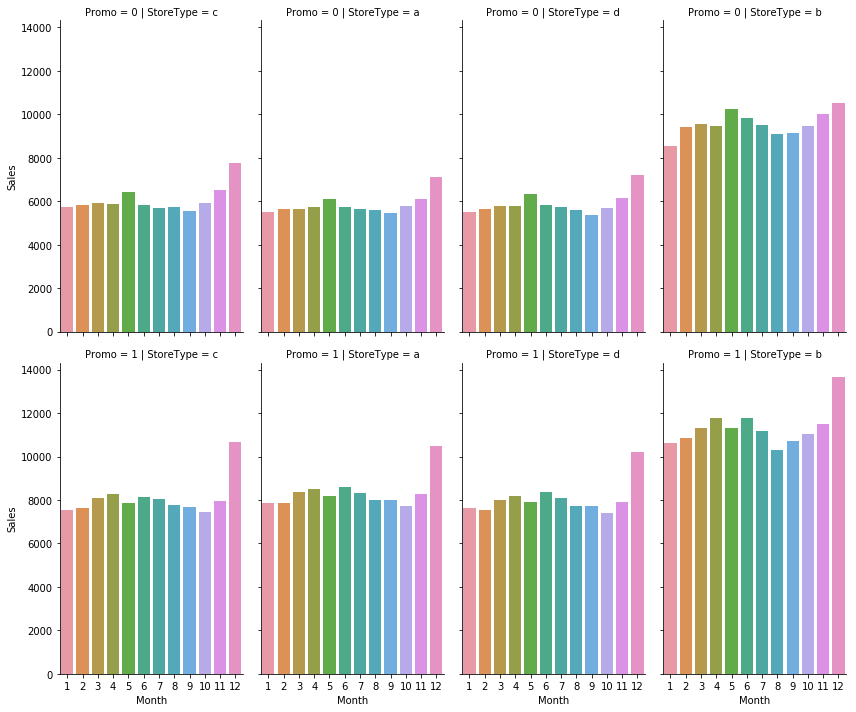

In [16]:
#查看不同类型商店每月的销售情况与Promo的关系

sns.catplot(x="Month", y="Sales",col="StoreType",
            data=train_and_store, saturation=.7,
            row='Promo',kind="bar", ci=None, aspect=.6)

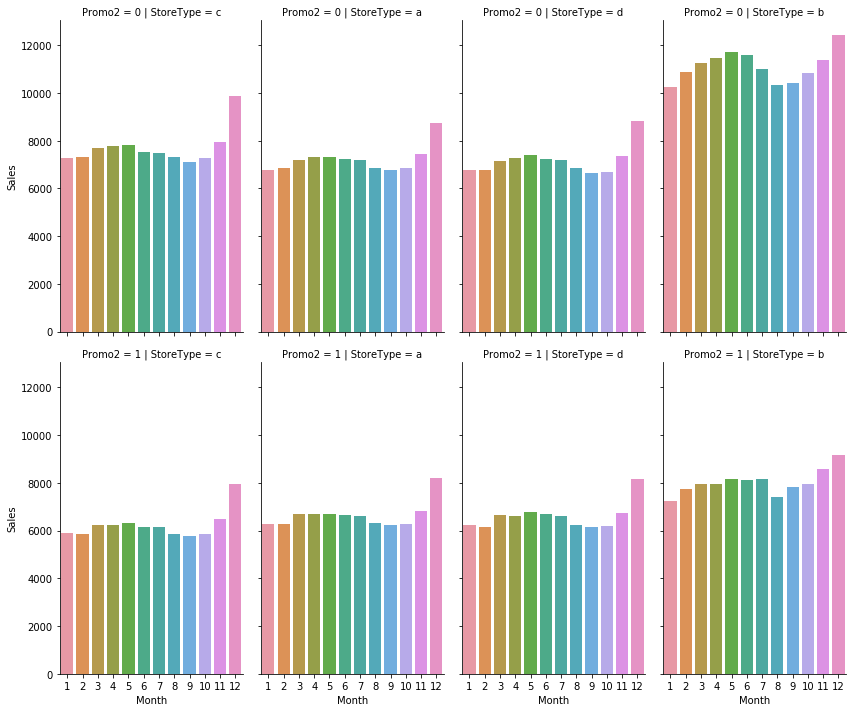

In [17]:
#查看不同类型商店每月的销售情况与Promo2的关系

sns.catplot(x="Month", y="Sales",col="StoreType",
            data=train_and_store, saturation=.7,
            row='Promo2',kind="bar", ci=None, aspect=.6)

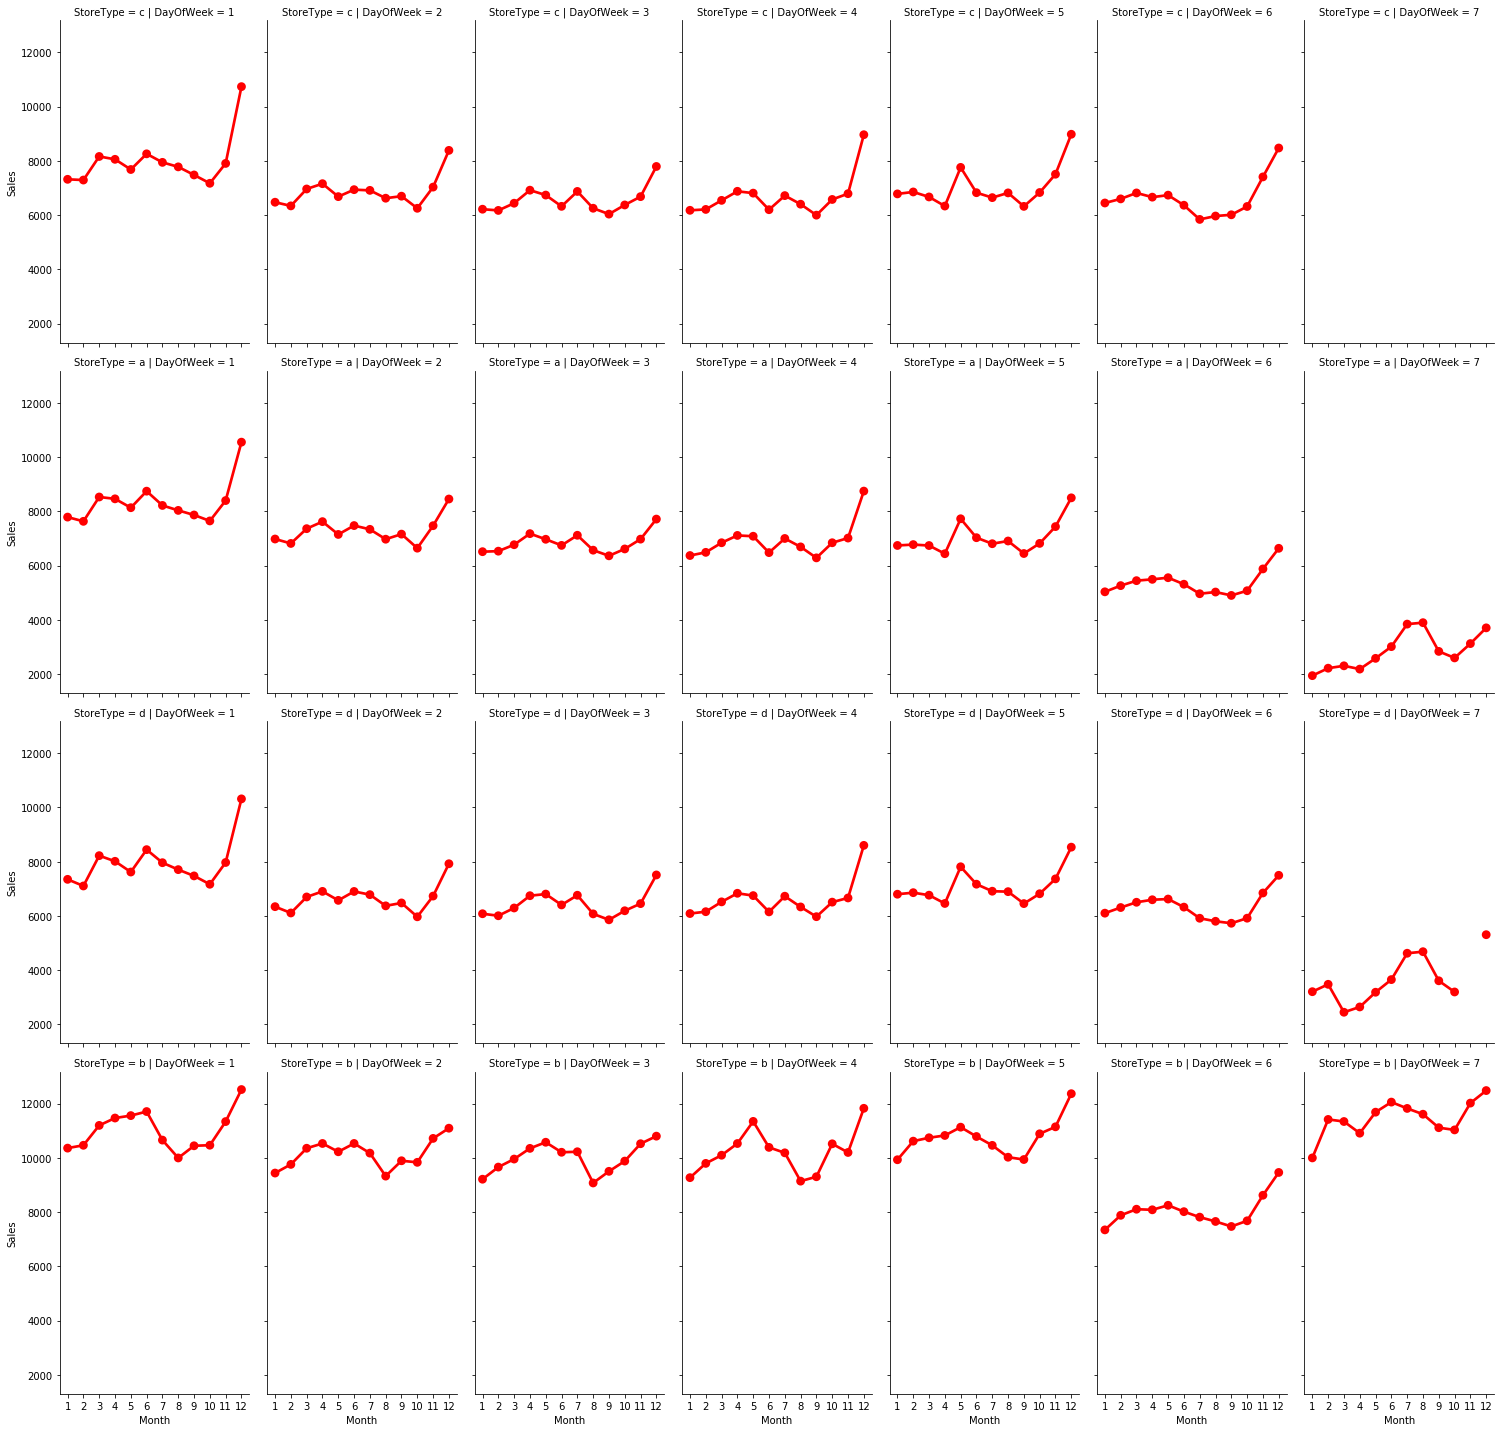

In [18]:
#查看各类型商店在每周不同时间的销售额情况

sns.catplot(x="Month", y="Sales",col="DayOfWeek",
            data=train_and_store, saturation=.7,color='Red',
            row='StoreType',kind="point", ci=None, aspect=.6)

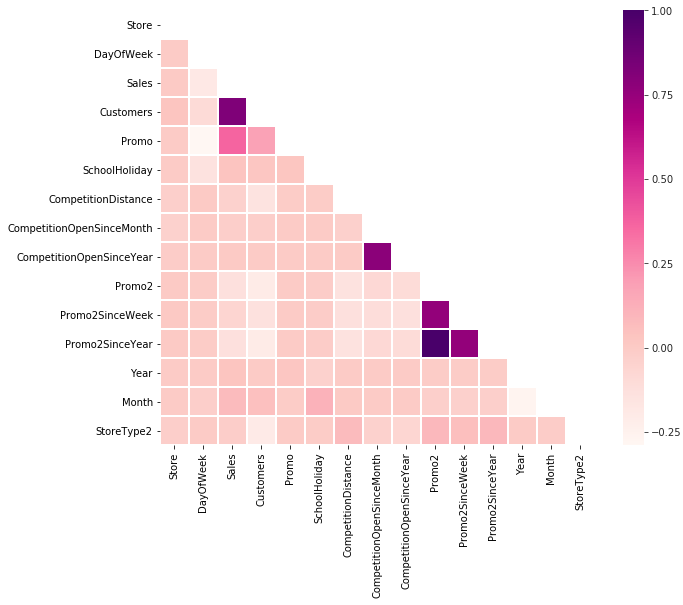

In [19]:
#绘制train_and_store数据集的的heatmap，查看特征间的相互关系

train_and_store['StoreType2'] = train_and_store['StoreType'].map({'a':1.,'b':2.,'c':3.,'d':4.})
corr = train_and_store.drop('Open', axis = 1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (10, 8))
with sns.axes_style("whitegrid"):
    ax = sns.heatmap(corr, mask=mask, linewidths = .6, square=True, cmap = "RdPu")

# 训练模型

In [20]:
#将‘StoreType’存入forecast变量，其余特征存在features_raw变量
sample_data = train_and_store.sample(n=10000)
forecast = sample_data['StoreType']
features_raw = sample_data.drop(['StoreType', 'StoreType2'], axis=1)

# 显示特征数据集
display(features_raw.head())
display(features_raw.shape)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
516895,685,4,2015-06-25,5537,573,1,0,0,0,a,650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",2015,6
81066,108,3,2014-06-04,11718,870,1,1,0,0,c,2190.0,9.0,2003.0,0,0.0,0.0,0,2014,6
765754,1014,5,2013-12-20,21020,2167,1,1,0,0,c,210.0,0.0,0.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,12
252804,336,6,2014-08-16,9793,1520,1,0,0,1,a,190.0,7.0,2014.0,0,0.0,0.0,0,2014,8
543166,720,1,2013-09-30,7284,769,1,0,0,0,c,15320.0,3.0,2011.0,1,14.0,2013.0,"Feb,May,Aug,Nov",2013,9


(10000, 19)

In [21]:
#特征数据进行独热编码并保存在features

features = pd.get_dummies(features_raw)

In [22]:
# 将数据拆分为训练集和测试集

import random
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, forecast, test_size=0.2, random_state=42)

In [23]:
#使用决策树算法建立模型

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
# 进行预测
y_test_pred = model.predict(X_test)

# 计算准确率
from sklearn.metrics import accuracy_score
from  sklearn.metrics import r2_score

test_accuracy = accuracy_score(y_test, y_test_pred)
print('The test accuracy is', test_accuracy)

The test accuracy is 0.8975


In [25]:
#使用网格搜索（GridSearchCV）来模型调优

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#初始化分类器
clf = DecisionTreeClassifier()

#希望调节的参数列表
parameters = {'min_samples_split':[1,2,3,4]}

#创建打分对象
scorer = make_scorer(accuracy_score)

#在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

#用训练数据拟合网格搜索对象并找到最佳参数
grid_fit = grid_obj.fit(X_train, y_train)

# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测

new_test_pred = best_clf.predict(X_test)

# 汇报调优后的模型
print ("best_clf\n------")
print (best_clf)

# 汇报调参前和调参后的分数
print ("\nUnoptimized model\n------")
print ("Accuracy score on test data: {:.4f}".format(accuracy_score(y_test, y_test_pred)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the test data: {:.4f}".format(accuracy_score(y_test, new_test_pred)))

best_clf
------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Unoptimized model
------
Accuracy score on test data: 0.8975

Optimized Model
------
Final accuracy score on the test data: 0.9000


In [26]:
#对某一样本进行多次预测验证模型健壮性

import warnings
warnings.filterwarnings('ignore')

#获取样本并查看其真实值
sample = X_test.iloc[100]
display(sample[['Sales','CompetitionDistance','Month','CompetitionOpenSinceMonth']])
print ("The real type value of the sample is  ['{}']".format(y_test.iloc[100]))
print ("The forecast type value of the sample is  {}\n".format(best_clf.predict(sample)))

#对样本设置新的参数值
sample.Sales = 4577
sample.CompetitionDistance = 6300
sample.Month = 6
sample.CompetitionOpenSinceMonth = 7

#多次运行测试结果
print ("Forcast Results\n------")
for i in range(10):
    print ("The No.{} time forecast result for the changed sample: {} ".format(i+1,best_clf.predict(sample)))

Sales                         3585.0
CompetitionDistance          15140.0
Month                            2.0
CompetitionOpenSinceMonth       12.0
Name: 74025, dtype: float64

The real type value of the sample is  ['d']
The forecast type value of the sample is  ['d']

Forcast Results
------
The No.1 time forecast result for the changed sample: ['a'] 
The No.2 time forecast result for the changed sample: ['a'] 
The No.3 time forecast result for the changed sample: ['a'] 
The No.4 time forecast result for the changed sample: ['a'] 
The No.5 time forecast result for the changed sample: ['a'] 
The No.6 time forecast result for the changed sample: ['a'] 
The No.7 time forecast result for the changed sample: ['a'] 
The No.8 time forecast result for the changed sample: ['a'] 
The No.9 time forecast result for the changed sample: ['a'] 
The No.10 time forecast result for the changed sample: ['a'] 
